### Load a map

In [1]:
from pymapmanager.mmMap import mmMap

# load a map
filePath = 'exampleMaps/rr30a/rr30a.txt'
m = mmMap(filePath=filePath)

map rr30a loaded in 0.45 seconds.


### Get the number of segments in the map

In [8]:
print m
print m.numMapSegments

map:rr30a map segments:5 stacks:9 total object:2467
5


## Using a dictionary to specify what annotations to get

Here we will use a plot dict to specify x, y, z stats as well as the segment

In [9]:
from pymapmanager.mmUtil import newplotdict

plotDict = newplotdict()
plotDict['xstat'] = 'days'
plotDict['ystat'] = 'pDist'
plotDict['zstat'] = 'ubssSum_int2' #'sLen3d_int1' #swap in any stat you like, e.g. 'ubssSum_int2'
plotDict['segmentid'] = [3]
plotDict['getMapDynamics'] = True
plotDict = m.getMapValues3(plotDict)

if 0:
    for key, value in plotDict.iteritems() :
        print key
    
    plotDict['dynamics']

mmMap.getMapValues3() took 0.04 seconds


## Plot dynamics with color

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

colorArray = np.array(['k', 'g', 'r', 'b', 'y'])
mRun, nSess = plotDict['dynamics'].shape
myColors = np.chararray([mRun,nSess], itemsize=9)
myColors[:] = colorArray[0]
goodIdx = ~np.isnan(plotDict['dynamics'])

myColors[goodIdx] = colorArray[plotDict['dynamics'][goodIdx].astype('int')]

# plot with matplotlib
plt.scatter(plotDict['x'], plotDict['y'], c=myColors.flatten())
plt.plot(plotDict['x'].transpose(), plotDict['y'].transpose(), '-', linewidth=1.0, color='gray')
plt.xlabel('Days', fontsize=16)
plt.ylabel('Dendrite Position (um)', fontsize=16)
plt.show()

## Use our plot functions

The mmMapPlot2 class has some useful plot function to get standard Map Manager plots along with colorizing the dynamics.

We are plotting to matplotlib figures so we need to use some magic with `%matplotlib notebook`.

<IPython.core.display.Javascript object>


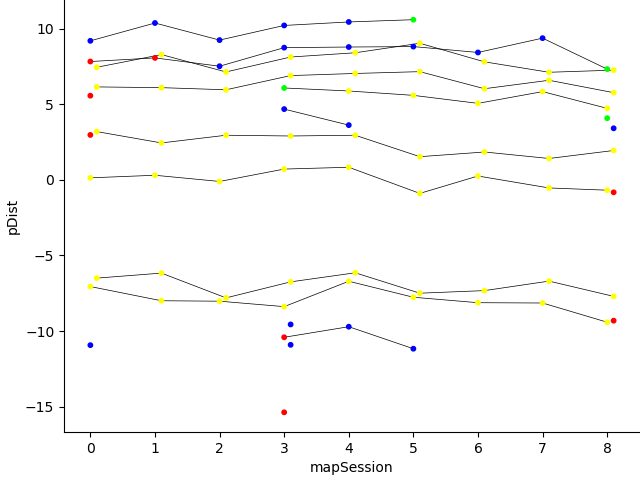

mmMap.getMapValues3() took 0.03 seconds


In [40]:
%matplotlib notebook
from pymapmanager.mmMapPlot2 import mmMapPlot2

myPlot = mmMapPlot2(m)

# mmMapPlot2 will plot to a figure
fig = plt.figure()

# specify the segment to plot with a plotDist
plotDict = newplotdict()
plotDict['segmentid'] = [3]

# plot the canonical map manager map
myPlot.plotMap0(fig,plotDict)

fig.show()



Now use myPlot.plotMap(fig,plotDict) to plot any two map values.

The mmMapPlot2.plotMap(fig,plotDict) function will plot any x/y values you specify in plotDict

<IPython.core.display.Javascript object>


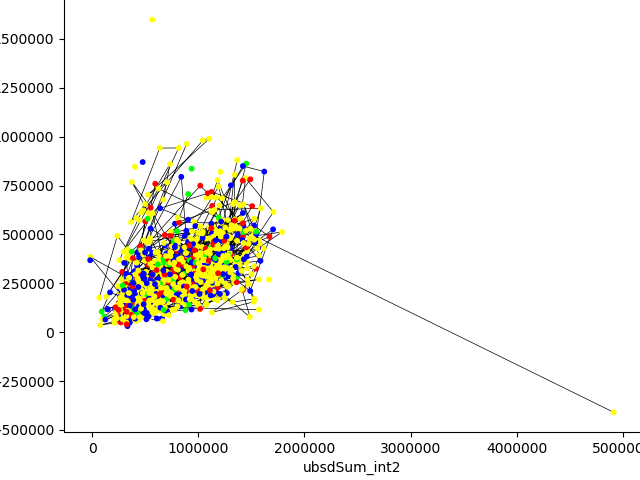

mmMap.getMapValues3() took 0.03 seconds


In [44]:
myPlot = mmMapPlot2(m)

# mmMapPlot2 will plot to a figure
fig = plt.figure()

# specify the segment to plot with a plotDist
plotDict = newplotdict()
plotDict['xstat'] = 'ubsdSum_int2'
plotDict['ystat'] = 'ubssSum_int2'
plotDict['segmentid'] = [] # all segments

# plot the canonical map manager map
myPlot.plotMap(fig,plotDict)

fig.show()

### We are not limited to plotting a single figure, we can plot a number of figure.

### Here we plot a canonical spine map for each map segment in a map.

<IPython.core.display.Javascript object>


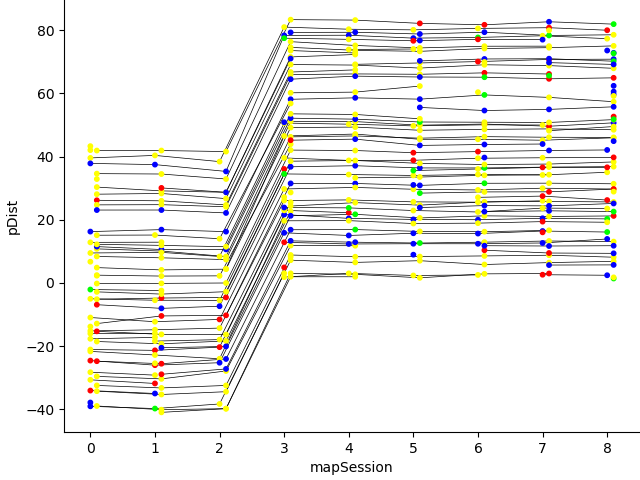

mmMap.getMapValues3() took 0.03 seconds


<IPython.core.display.Javascript object>


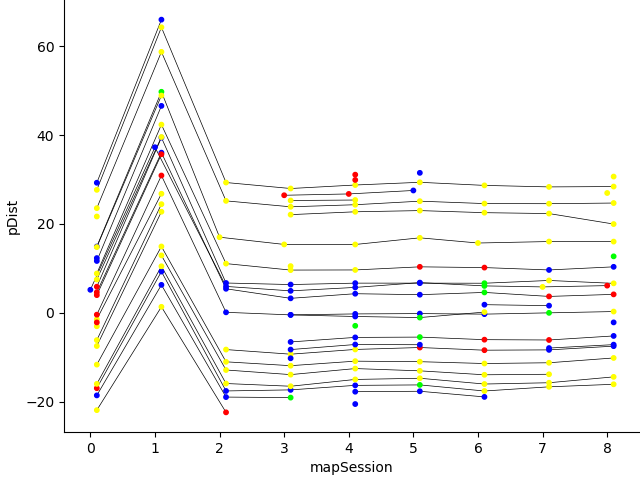

mmMap.getMapValues3() took 0.05 seconds


<IPython.core.display.Javascript object>


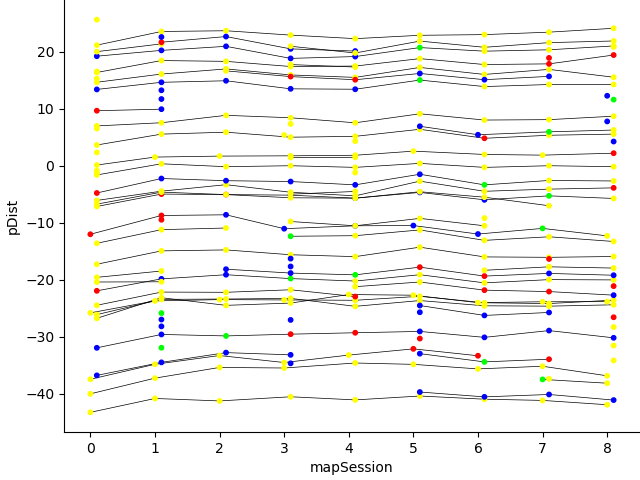

mmMap.getMapValues3() took 0.03 seconds


<IPython.core.display.Javascript object>


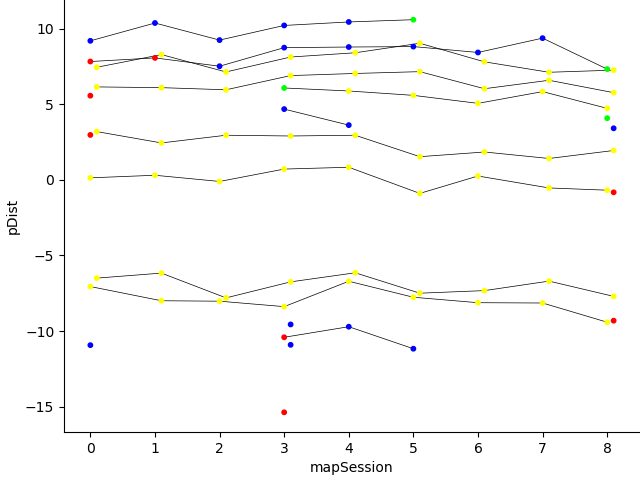

mmMap.getMapValues3() took 0.03 seconds


<IPython.core.display.Javascript object>


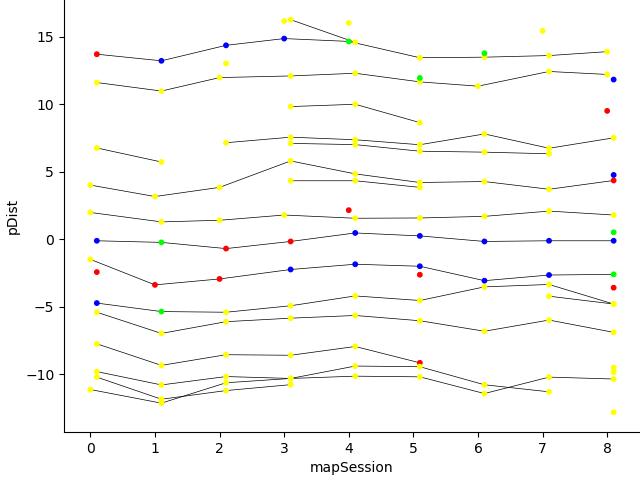

mmMap.getMapValues3() took 0.03 seconds


In [42]:
plotDict = newplotdict()
for i in range(m.numMapSegments):
    # the current map segment we will plot
    plotDict['segmentid'] = [i]

    fig = plt.figure()
    myPlot.plotMap0(fig,plotDict)
    fig.show()

### Calculate spine dynamics for each segment in a map

In [1]:
import pandas as pd
from IPython.display import display # displays pretty table in ipython

from pymapmanager.mmMap import mmMap
from pymapmanager.mmUtil import newplotdict
from pymapmanager.mmMapAnalysis import getMapDynamics

# load a map
filePath = 'exampleMaps/rr30a/rr30a.txt'
m = mmMap(filePath=filePath)

plotDict = newplotdict()
plotDict = getMapDynamics(m, plotDict) # this is a stand-alone function, you can write your own

# this will make m.numMapSegments tables (5 in this example)
for i, segmentReport in enumerate(plotDict):
    print '\n\n=== segment', str(i), '==='
    display(pd.DataFrame.from_dict(segmentReport, orient='index'))

map rr30a loaded in 0.44 seconds.
getMapDynamics() took 0.298136949539 seconds


=== segment 0 ===


,0,1,2,3,4,5,6,7,8
numgood,51.000000,50.000000,43.000000,59.000000,50.000000,52.000000,53.000000,56.000000,57.000000
goodlen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
padd,NaN,11.764706,2.000000,37.209302,5.084746,16.000000,13.461538,13.207547,23.214286
goodlensmoothed,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
numbad,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
tor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dadd,0.000000,0.059300,0.010025,0.185875,0.032059,0.086104,0.081227,0.071154,0.129413
totalnum,51.000000,50.000000,43.000000,59.000000,50.000000,52.000000,53.000000,56.000000,57.000000
numadd,0.000000,6.000000,1.000000,16.000000,3.000000,8.000000,7.000000,7.000000,13.000000
numsub,7.000000,8.000000,0.000000,12.000000,6.000000,6.000000,4.000000,12.000000,0.000000




=== segment 1 ===


,0,1,2,3,4,5,6,7,8
numgood,25.000000,22.000000,15.000000,22.000000,24.000000,20.000000,18.000000,17.000000,19.000000
goodlen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
padd,NaN,4.000000,4.545455,50.000000,20.833333,4.000000,5.000000,5.555556,22.222222
goodlensmoothed,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
numbad,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
tor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dadd,0.000000,0.014036,0.006788,0.083156,0.047677,0.009296,0.008851,0.008776,0.038680
totalnum,25.000000,22.000000,16.000000,24.000000,25.000000,20.000000,18.000000,18.000000,19.000000
numadd,0.000000,1.000000,1.000000,8.000000,5.000000,1.000000,1.000000,1.000000,4.000000
numsub,4.000000,8.000000,1.000000,3.000000,5.000000,3.000000,2.000000,2.000000,0.000000




=== segment 2 ===


,0,1,2,3,4,5,6,7,8
numgood,37.000000,39.000000,29.000000,40.000000,36.000000,35.000000,35.000000,36.000000,39.000000
goodlen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
padd,NaN,24.324324,5.128205,41.379310,7.500000,16.216216,5.714286,11.111111,26.315789
goodlensmoothed,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
numbad,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000
tor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dadd,0.000000,0.067452,0.012748,0.127390,0.026299,0.046387,0.017428,0.027738,0.076193
totalnum,37.000000,39.000000,29.000000,40.000000,37.000000,35.000000,36.000000,38.000000,39.000000
numadd,0.000000,9.000000,2.000000,12.000000,3.000000,6.000000,2.000000,4.000000,10.000000
numsub,7.000000,12.000000,1.000000,7.000000,7.000000,2.000000,3.000000,7.000000,0.000000




=== segment 3 ===


,0,1,2,3,4,5,6,7,8
numgood,11.000000,8.000000,8.000000,14.000000,11.000000,10.000000,8.000000,8.000000,12.000000
goodlen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
padd,NaN,0.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,50.000000
goodlensmoothed,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
numbad,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
tor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dadd,0.000000,0.000000,0.000000,0.178553,0.000000,0.000000,0.000000,0.000000,0.091111
totalnum,11.000000,8.000000,8.000000,14.000000,11.000000,11.000000,8.000000,8.000000,12.000000
numadd,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,4.000000
numsub,3.000000,0.000000,0.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000




=== segment 4 ===


,0,1,2,3,4,5,6,7,8
numgood,14.000000,13.000000,14.000000,18.000000,18.000000,17.000000,13.000000,14.000000,19.000000
goodlen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
padd,NaN,0.000000,14.285714,33.333333,10.526316,10.526316,5.882353,14.285714,53.333333
goodlensmoothed,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
numbad,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
tor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dadd,0.000000,0.000000,0.039200,0.122652,0.030487,0.037198,0.012552,0.027538,0.137012
totalnum,15.000000,14.000000,15.000000,19.000000,19.000000,17.000000,14.000000,15.000000,20.000000
numadd,0.000000,0.000000,2.000000,5.000000,2.000000,2.000000,1.000000,2.000000,8.000000
numsub,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,1.000000,3.000000,0.000000
